Mariana Valenzuela Lafarga

02 de mayo de 2025

# Actividad - Ecuaciones diferenciales

1. Resolver numéricamente con `solve_ivp` la siguiente ecuación diferencial:
$$\frac{dx}{dt}=\frac{x}{t+1}$$

In [10]:
import numpy as np
from scipy.integrate import solve_ivp, odeint
def fun(t,x):
    return x/(t+1)
t= [0,10]
x0= np.array([0.5])
sol_x= solve_ivp(fun,t,x0)
sol_x

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 20
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  0.10003997,  1.10043965, 10.        ])
 t_events: None
        y: array([[0.5       , 0.55001998, 1.05021982, 5.5       ]])
 y_events: None

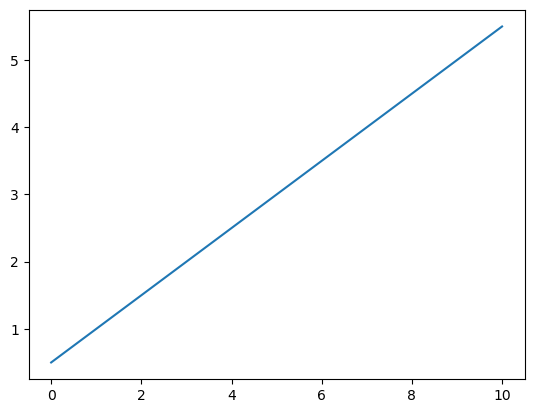

In [11]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(sol_x.t,sol_x.y[0,:])

Grafique con condición inicial $x_0 = 2$

In [16]:
import numpy as np
from scipy.integrate import solve_ivp, odeint
def fun(t,x):
    return x/(t+1)
t= [0,10]
x0= np.array([2])
sol_x= solve_ivp(fun,t,x0)
sol_x

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 20
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  0.10001   ,  1.10010998, 10.        ])
 t_events: None
        y: array([[ 2.        ,  2.20002   ,  4.20021996, 22.        ]])
 y_events: None

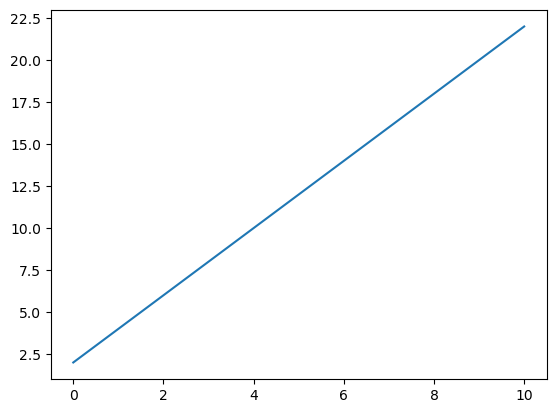

In [17]:
plt.figure()
plt.plot(sol_x.t,sol_x.y[0,:])

2. Encuentre la solución numérica para un oscilador armónico simple:

$$
\frac{d^2 x}{dt^2} +  \omega_{0}^2 x = 0.
$$
Donde $x_0=0.5$, $\dot{x}_0=0.1$ y $\omega_0=3$.

2.1 Defina una función, cuyos argumentos de entrada sean:


1. el tiempo $t$,
2. el arreglo $[x,\dot{x}]$.

Y la salida:

1. el arreglo $[\dot{x},\ddot{x}]$.

  Considerando el argumento de la frecuencia natural $\omega_0$ debe ser una variable global.

In [23]:
from scipy.integrate import solve_ivp
def oscilador(t,X,w0):
    x= X[0]
    v= X[1]
    dx= v
    dv= -w0**2*x
    return [dx,dv]


tspan=[0,10]
x0= np.array([0.5,0.1])
sol= solve_ivp(oscilador, tspan,x0, args=(3,), max_step=0.1)
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 608
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  0.03155236,  0.13155236,  0.23155236,  0.33155236,
        0.43155236,  0.53155236,  0.63155236,  0.73155236,  0.83155236,
        0.93155236,  1.03155236,  1.13155236,  1.23155236,  1.33155236,
        1.43155236,  1.53155236,  1.63155236,  1.73155236,  1.83155236,
        1.93155236,  2.03155236,  2.13155236,  2.23155236,  2.33155236,
        2.43155236,  2.53155236,  2.63155236,  2.73155236,  2.83155236,
        2.93155236,  3.03155236,  3.13155236,  3.23155236,  3.33155236,
        3.43155236,  3.53155236,  3.63155236,  3.73155236,  3.83155236,
        3.93155236,  4.03155236,  4.13155236,  4.23155236,  4.33155236,
        4.43155236,  4.53155236,  4.63155236,  4.73155236,  4.83155236,
        4.93155236,  5.03155236,  5.13155236,  5.23155236,  5.33155236,
        5.43155236,  5.531552

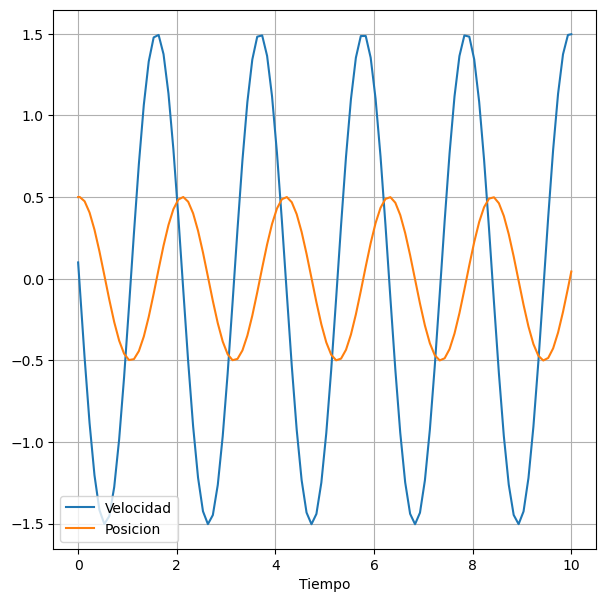

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize= (7,7))
plt.plot(sol.t,sol.y[1,:], label= "Velocidad")
plt.plot(sol.t,sol.y[0,:], label= "Posicion")
plt.legend(loc="best")
plt.xlabel("Tiempo")
plt.grid()


Grafique

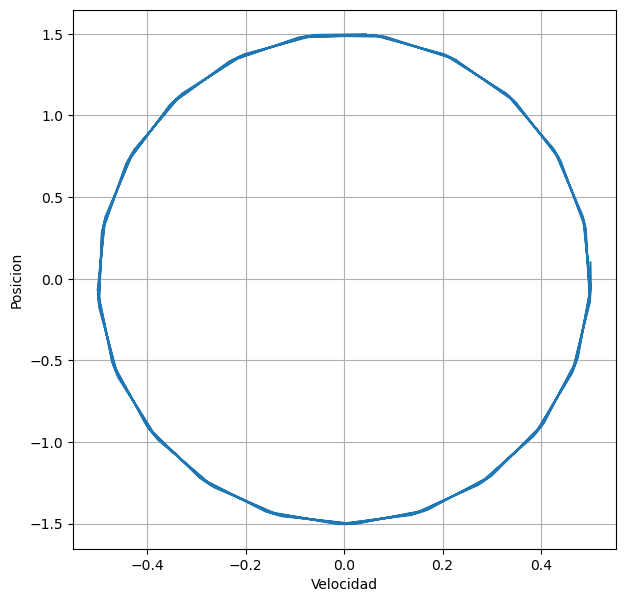

In [25]:
plt.figure(figsize=(7,7))
plt.plot(sol.y[0,:], sol.y[1,:])
plt.xlabel("Velocidad")
plt.ylabel("Posicion")
plt.grid()

Escribe el codigo de la solucion analitica del oscilador con condiciones iniciales

In [26]:
def pos(t,w0,x0,v0):
    return x0* np.cos(w0*t) + v0/w0 *np.sin(w0*t)

def vel(t,w0,x0,v0):
    return w0* (-x0*np.sin(w0*t)+ v0/w0* np.cos(w0*t))


Redefina la función para graficarla (con la palabra reservada ***def***) en un intervalo de tiempo de 0 a 10 segundos. Comparela en un mismo grafico con la solución numérica obtenida.

In [39]:
def graficar(tf, X0, w0) :
    ta= np.linspace(0,tf,1000)
    x0 = X0[0]
    v0 = X0[1]
    xa= pos(ta, w0, x0, v0)

    tspan= [0,tf]
    xn=solve_ivp(oscilador, tspan,X0, args=(w0,), max_step=0.1)
    
    plt.figure(figsize= (7,7))
    plt.plot(ta,xa, label= "Analitica")
    plt.plot(xn.t,sol.y[0,:], label= "Numerica")
    plt.legend(loc="best")
    plt.xlabel("Tiempo")
    plt.grid()


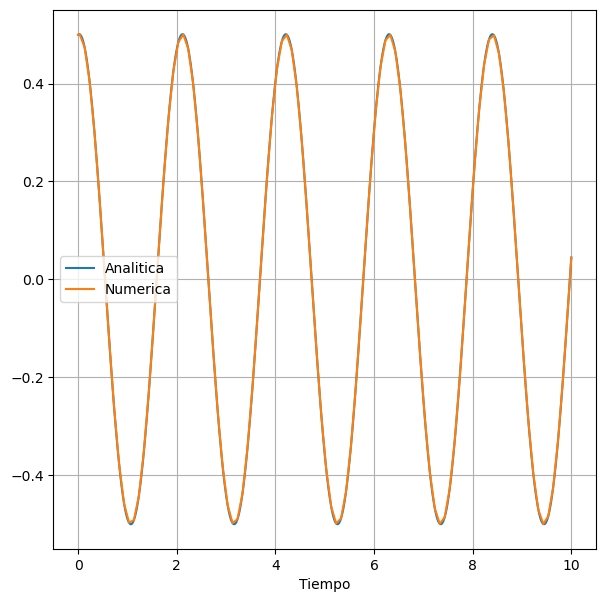

In [40]:
graficar(10, np.array([0.5,0.1]), 3)

In [35]:
ta= np.linspace(0,10,1000)
x0= np.array([0.5,0.1])
xa= pos(ta, 3, x0[0],x0[1])
tspan= [0,10]
xn=solve_ivp(oscilador, tspan,x0, args=(3,), max_step=0.1)

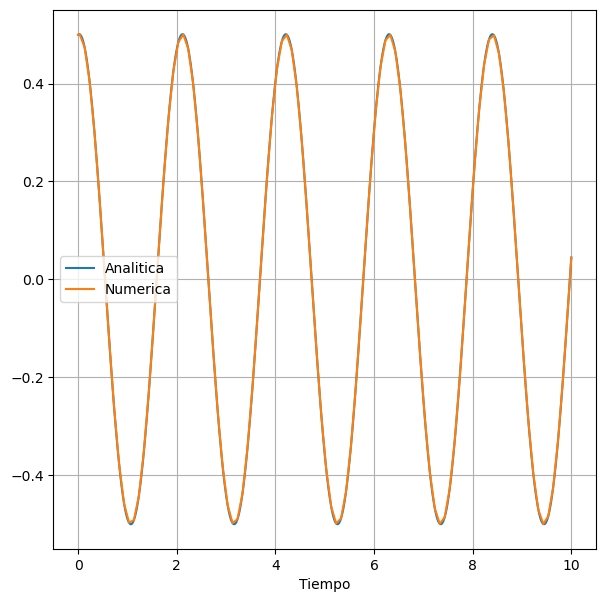

In [36]:
plt.figure(figsize= (7,7))
plt.plot(ta,xa, label= "Analitica")
plt.plot(xn.t,sol.y[0,:], label= "Numerica")
plt.legend(loc="best")
plt.xlabel("Tiempo")
plt.grid()
